# Import

In [8]:
import sys
sys.path.append("/home/leonid/github.com/LeonidPilyugin/upt")

In [9]:
from upt import *
print("Import done!")

Import done!


# Read data

In [10]:
na = Data("../data/na.csv")
hgy1 = Data("../data/hgy1.csv")
hgy2 = Data("../data/hgy2.csv")
hgg = Data("../data/hgg.csv")

# Texify primary data

In [7]:
texify(na, path="../tex/na.tex")
texify(hgy1, path="../tex/hgy1.tex")
texify(hgy2, path="../tex/hgy2.tex")
texify(hgg, path="../tex/hgyg.tex")

# Add values

In [5]:
dr_na = Value(164.400, 0.001, u.mm) - Value(163.951, 0.001, u.mm)
dr_hgy1 = Value(176.810, 0.001, u.mm) - Value(172.740, 0.001, u.mm)
dr_hgy2 = Value(169.020, 0.001, u.mm) - Value(166.242, 0.001, u.mm)
dr_hgg = Value(177.850, 0.001, u.mm) - Value(175.814, 0.001, u.mm)

L_na = Value(90, 0, u.micrometer)
L_hg = Value(100, 0, u.micrometer)

f_na = Value(50, 0, u.mm)
f_hg = Value(110, 0, u.mm)

lambda_na = Value(5893, 0, u.angstrom)
lambda_hgg = Value(5461, 0, u.angstrom)

In [6]:
dr_hgy2

2.7780 +/- 0.0014, millimeter

In [7]:
na["d"] = Array([na["x"][i] - na["x"][19 - i] for i in range(20)])
na_nd = na[10:].copy()
na_nd["n"] = na_nd["n"] - Value(10)
del na_nd["x"]
na_nd

,n,d
10,1,"6.0000 +/- 0.0014, millimeter"
11,2,"9.7570 +/- 0.0014, millimeter"
12,3,"12.9160 +/- 0.0014, millimeter"
13,4,"15.2440 +/- 0.0014, millimeter"
14,5,"17.4470 +/- 0.0014, millimeter"
15,6,"19.2970 +/- 0.0014, millimeter"
16,7,"20.9120 +/- 0.0014, millimeter"
17,8,"21.9920 +/- 0.0014, millimeter"
18,9,"23.5050 +/- 0.0014, millimeter"
19,10,"25.0910 +/- 0.0014, millimeter"


In [8]:
hgg["d"] = Array([hgg["x"][i] - hgg["x"][9 - i] for i in range(10)])
hgg_nd = hgg[5:].copy()
hgg_nd["n"] = hgg_nd["n"] - Value(5)
hgg_nd["n"] = hgg_nd["n"]
del hgg_nd["x"]
hgg_nd

,n,d
5,1,"12.1420 +/- 0.0014, millimeter"
6,2,"20.4140 +/- 0.0014, millimeter"
7,3,"26.2620 +/- 0.0014, millimeter"
8,4,"30.7640 +/- 0.0014, millimeter"
9,5,"34.9450 +/- 0.0014, millimeter"


In [9]:
k_hg, b_hg = chi2(hgg_nd["n"], hgg_nd["d"] ** 2)
k_hg, b_hg

(268.2 +/- 1.2, millimeter ** 2, -120 +/- 3, millimeter ** 2)

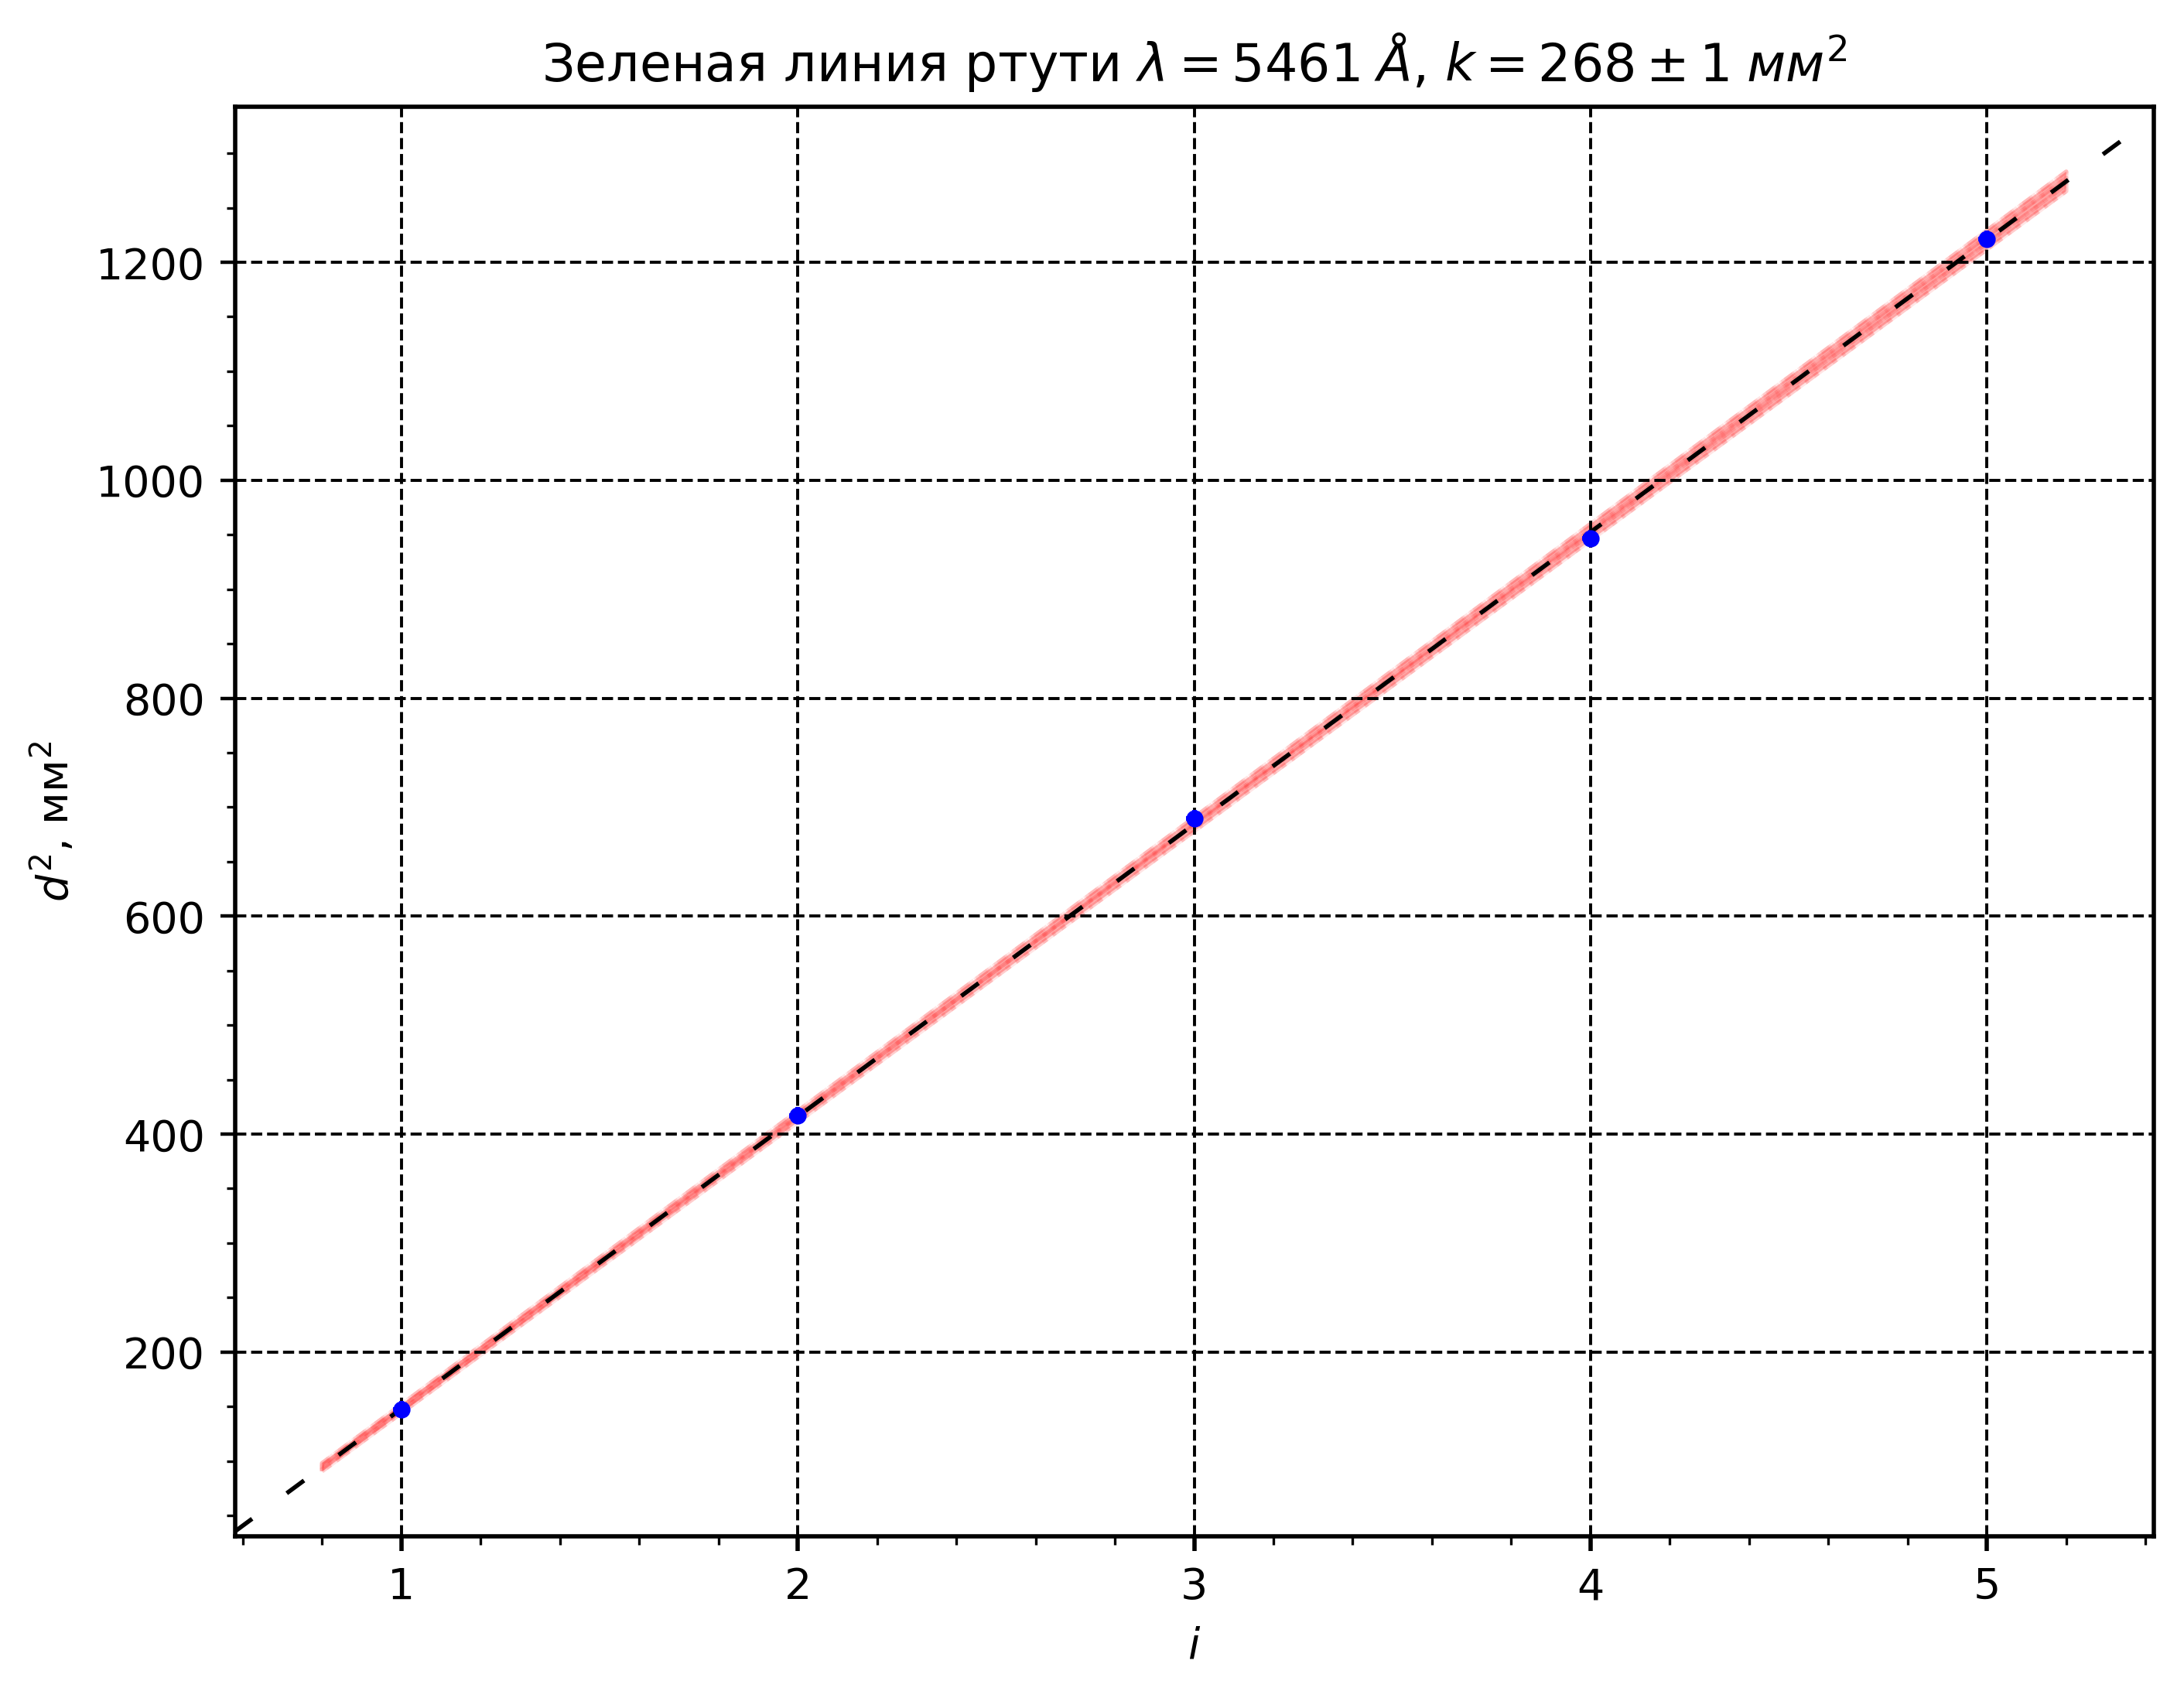

In [10]:
p1 = Plot()
p1.plot(hgg_nd["n"], hgg_nd["d"] ** 2, fmt=".")
p1.xlabel("$i$")
p1.ylabel("$d^2$")
p1.line(k_hg, b_hg, color="red", linestyle='dashed')
p1.title("Зеленая линия ртути $\\lambda = 5461 \\; Å$, $k = 268 \\pm 1 \\; мм^2$")
p1.save("../img/plothg.png")

In [11]:
_L_hg = lambda_hgg * 4 * f_hg ** 2 / k_hg
_L_hg

(986 +/- 4) e-4, millimeter

In [12]:
k_na, b_na = chi2(na_nd["n"], na_nd["d"] ** 2)
k_na, b_na

(65.8 +/- 0.6, millimeter ** 2, -31 +/- 2, millimeter ** 2)

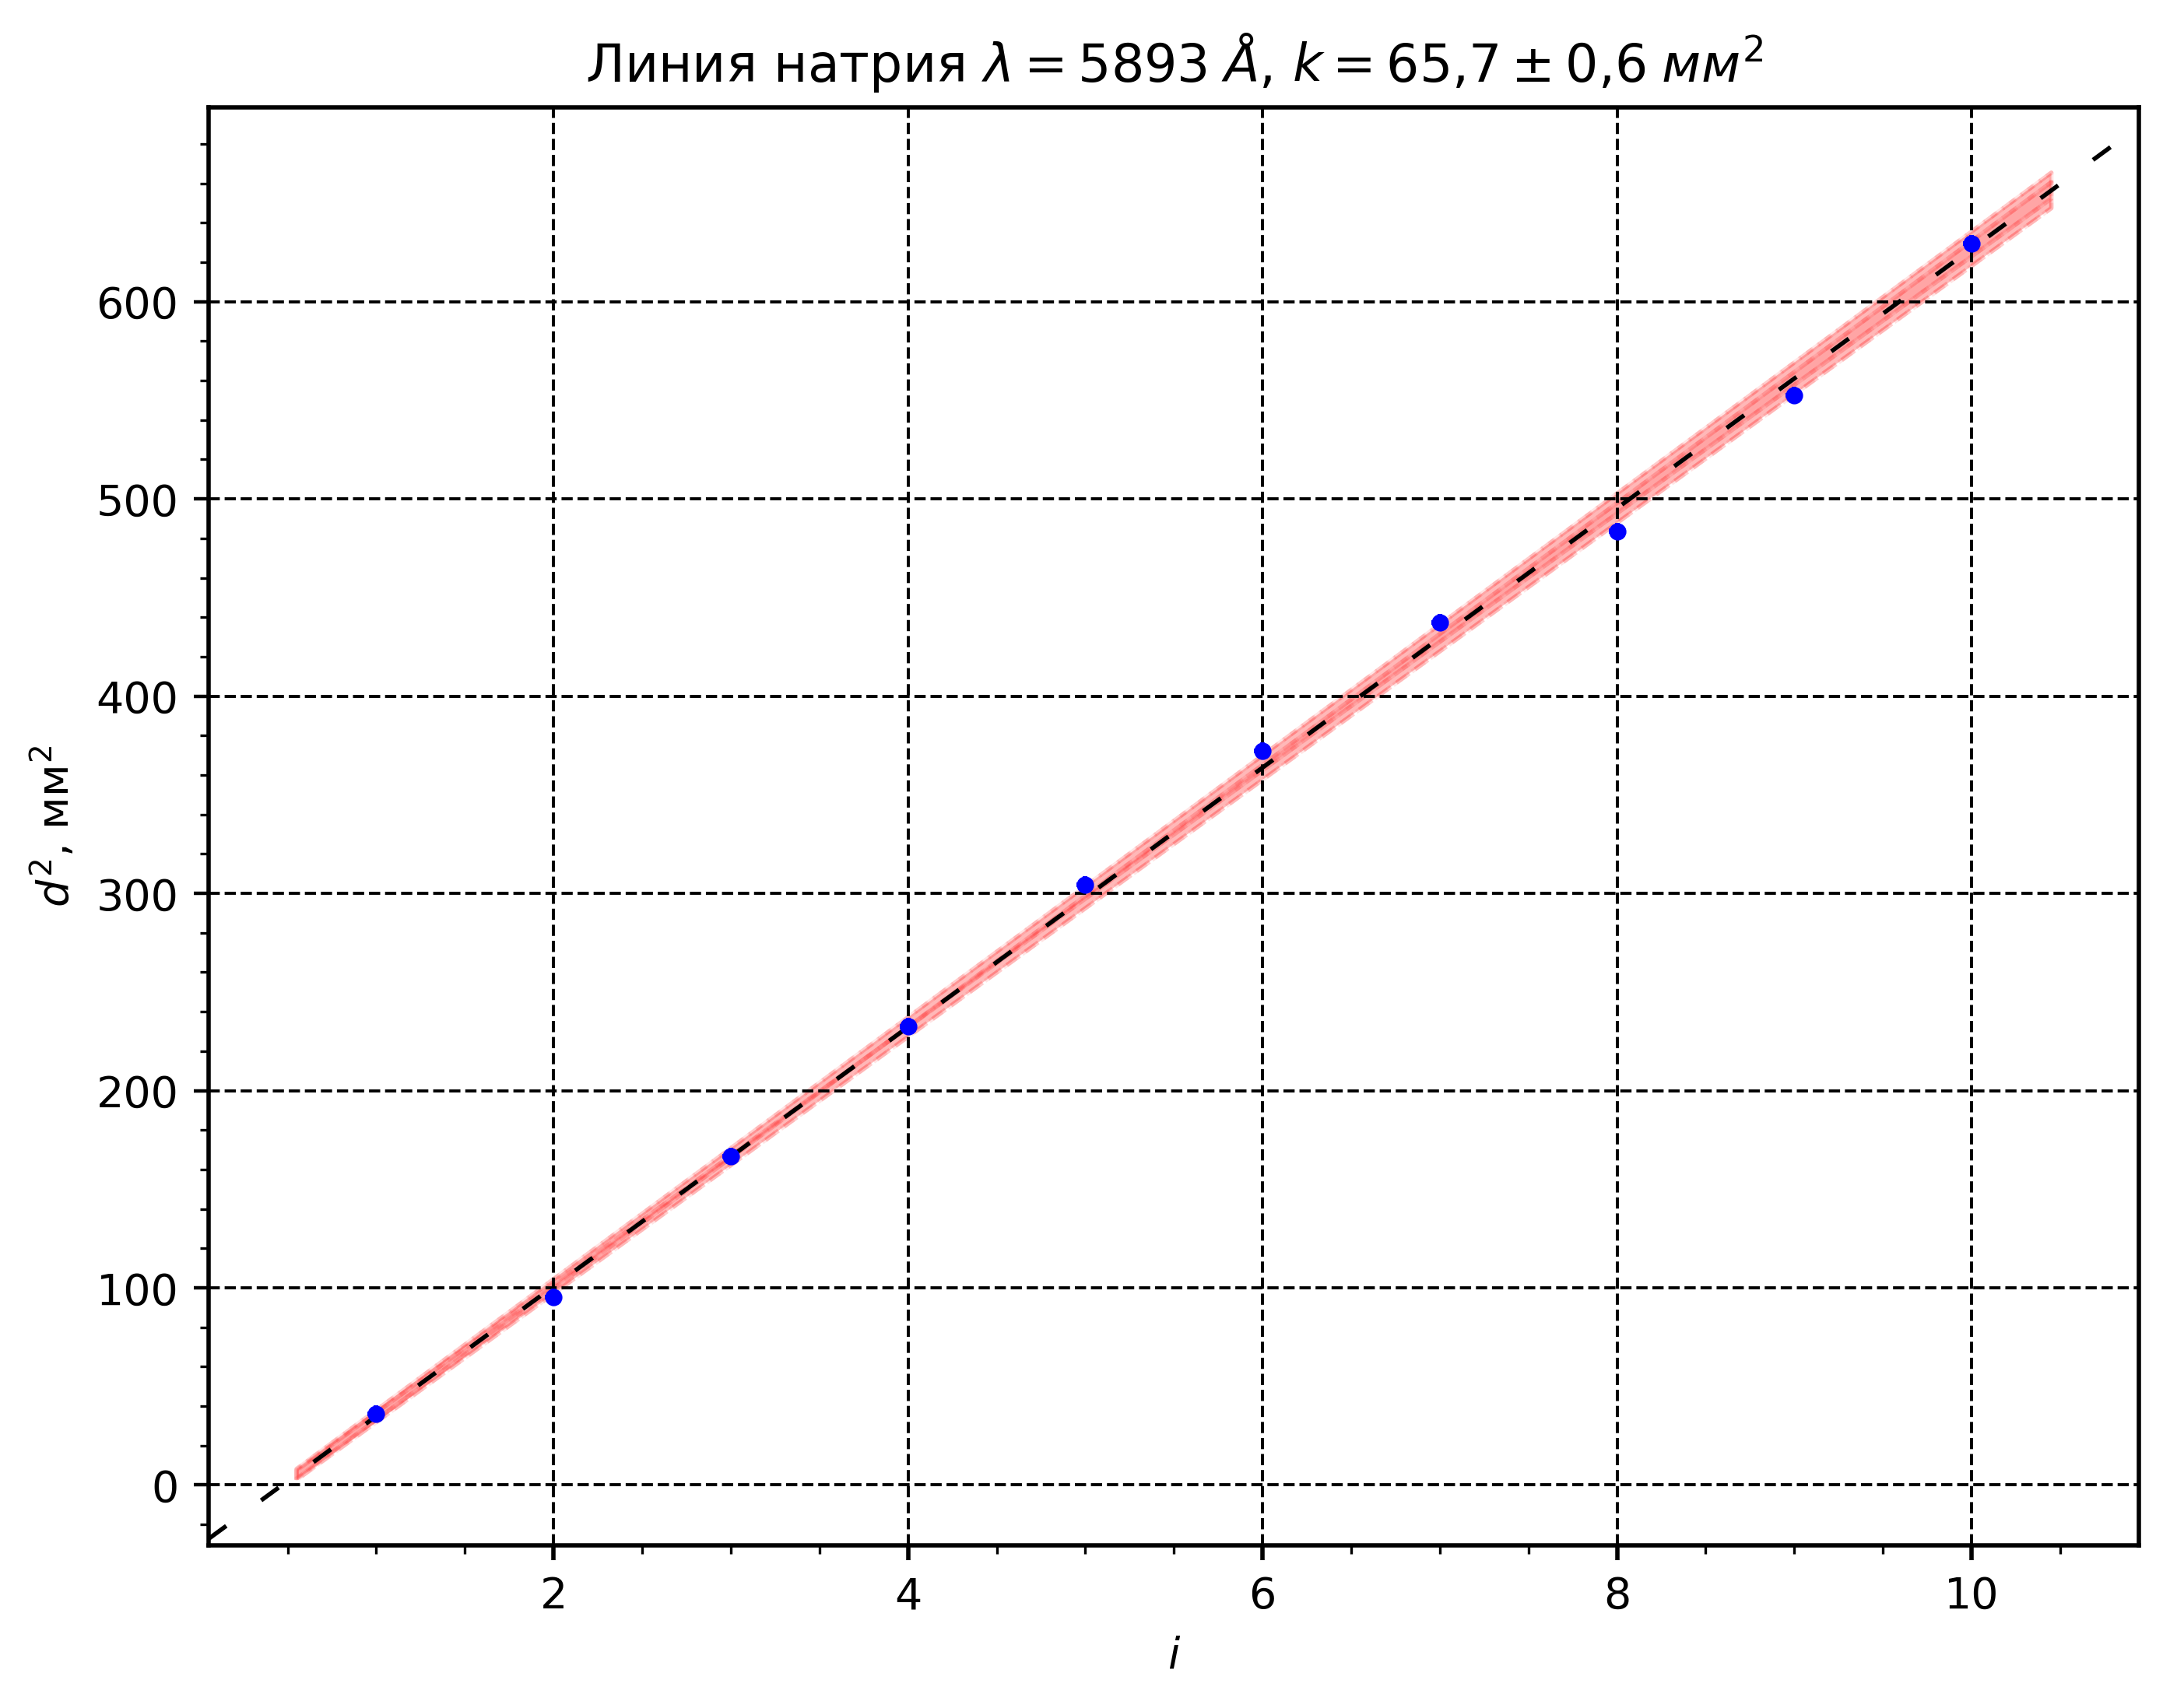

In [13]:
p1 = Plot()
p1.plot(na_nd["n"], na_nd["d"] ** 2, fmt=".")
p1.xlabel("$i$")
p1.ylabel("$d^2$")
p1.line(k_na, b_na, color="red", linestyle='dashed')
p1.ax.set_title("Линия натрия $\\lambda = 5893 \\; Å$, $k = 65{,}7 \\pm 0{,}6 \\; мм^2$")
p1.save("../img/plotna.png")

In [14]:
_L_na = 4 * lambda_na * f_na ** 2 / k_na
_L_na

(896 +/- 9) e-4, millimeter

In [15]:
texify(f_hg * 4 ** 2 / hgg_nd["d"][0] / dr_hgg)

71{,}19 \pm 0{,}05\;\mathrm{мм}^{-1}
